# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [109]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sn

In [110]:
df = pd.read_csv(r"C:\Users\Tekno\Downloads\customer_booking.csv", encoding="ISO-8859-1")
shape = df.shape
print(f'The shape is {shape}')
df.head(10)

The shape is (50000, 14)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [111]:
x = df[df['booking_complete']==1]
x.shape

(7478, 14)

In [112]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

##### we can see booking_complete has binary values of 0 and 1. this will be our predicted variable 

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [114]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [115]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [116]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [117]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

#### Define the Predictors and Predicted values  

In [118]:
y_cols = np.array(df['booking_complete'])
y_cols.shape

(50000,)

In [119]:
from sklearn.preprocessing import OneHotEncoder
df1 = pd.get_dummies(df[['sales_channel','trip_type','booking_origin']])
x_cols = pd.concat([df1,df], axis=1)
shape = x_cols.shape
print(f'the shape of the X_cols is {shape}')
x_cols.head(3)

the shape of the X_cols is (50000, 123)


,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_origin_(not set),booking_origin_Afghanistan,booking_origin_Algeria,booking_origin_Argentina,booking_origin_Australia,...,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,0,0,0,1,0,0,0,0,0,...,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,0,0,1,0,0,0,0,0,...,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,1,0,0,0,1,0,0,0,0,0,...,22,17,3,AKLDEL,India,1,1,0,5.52,0


#### Drop Columns

In [120]:
x_cols.drop(columns=['sales_channel','trip_type','route','booking_origin','booking_complete'], inplace=True)

In [121]:
x_cols.head(10)

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_origin_(not set),booking_origin_Afghanistan,booking_origin_Algeria,booking_origin_Argentina,booking_origin_Australia,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1,0,0,0,1,0,0,0,0,0,...,0,2,262,19,7,6,1,0,0,5.52
1,1,0,0,0,1,0,0,0,0,0,...,0,1,112,20,3,6,0,0,0,5.52
2,1,0,0,0,1,0,0,0,0,0,...,0,2,243,22,17,3,1,1,0,5.52
3,1,0,0,0,1,0,0,0,0,0,...,0,1,96,31,4,6,0,0,1,5.52
4,1,0,0,0,1,0,0,0,0,0,...,0,2,68,22,15,3,1,0,1,5.52
5,1,0,0,0,1,0,0,0,0,0,...,0,1,3,48,20,4,1,0,1,5.52
6,1,0,0,0,1,0,0,0,0,0,...,0,3,201,33,6,4,1,0,1,5.52
7,1,0,0,0,1,0,0,0,0,0,...,0,2,238,19,14,1,1,0,1,5.52
8,1,0,0,0,1,0,0,0,0,0,...,0,1,80,22,4,1,0,0,1,5.52
9,0,1,0,0,1,0,0,0,0,0,...,0,1,378,30,12,7,0,0,0,5.52


#### The codes below splits the X and y_cols into training 30% and testing data 70%`

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_cols,y_cols, test_size = 0.3, random_state=42)

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
X_train.shape

(35000, 118)

In [125]:
y_train.shape

(35000,)

In [126]:
X_test.shape

(15000, 118)

In [127]:
y_test.shape

(15000,)

In [128]:
# Evaluate initial model on validation set using CV
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_test, y_test, cv=5)

In [129]:
cv_scores

array([0.85233333, 0.85233333, 0.85233333, 0.85233333, 0.852     ])

#### Fit the model

In [130]:
# Tune hyperparameters based on CV scores
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5) 
# Retrain on train + val sets with best hyperparameters
rf.fit(np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)))

RandomForestClassifier(min_samples_leaf=5)

In [131]:
rf.score(X_test,y_test)

C:\Users\Tekno\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8548666666666667

In [132]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
cm

array([[12354,   430],
       [ 2151,    65]], dtype=int64)

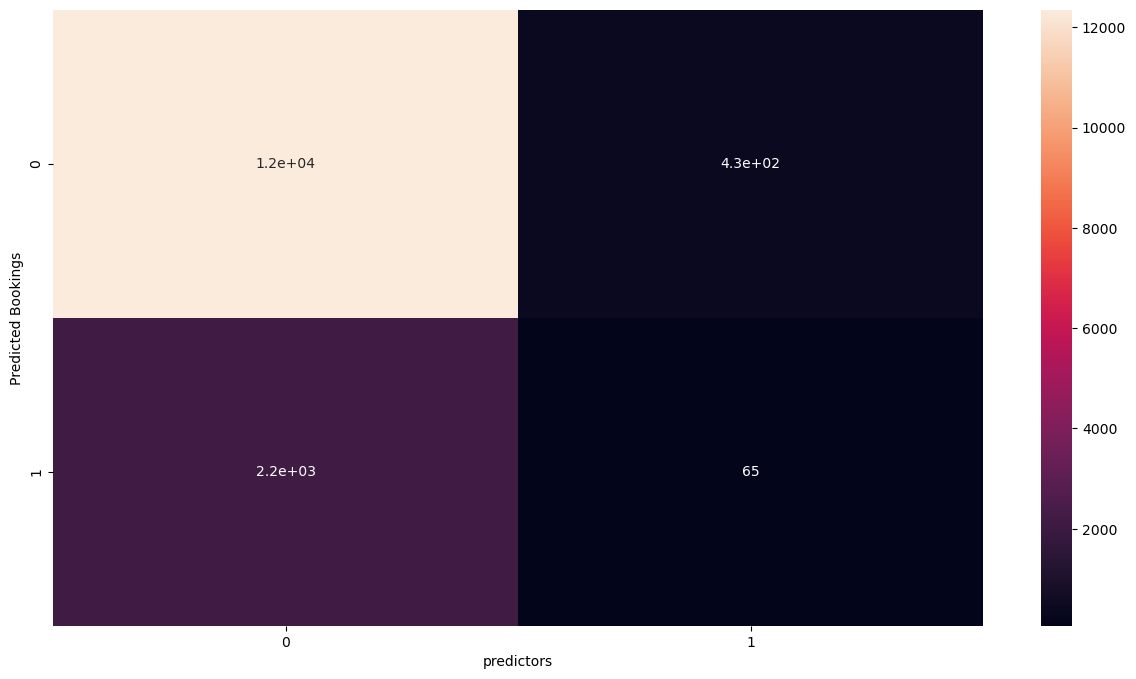

In [133]:
import seaborn as sn 
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8)) 

sn.heatmap(cm, annot=True)

plt.xlabel('predictors') 

plt.ylabel('Predicted Bookings')

plt.show()

True Negatives (TN) = 12354: The model correctly predicted 12354 instances as negative.
False Positives (FP) = 430: The model incorrectly predicted 430 instances as positive.
False Negatives (FN) = 2151: The model incorrectly predicted 2151 instances as negative.
True Positives (TP) = 65: The model correctly predicted 65 instances as positive.
bringi9ng the correctly predicted result to 81.7%